## Import Libraries and Set Paths

In [1]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to the test dataset and saved model
test_data_dir = "mini_dataset/test"  # Directory containing test images
model_path = "fashion_mnist_cnn_model.h5"  # Path to the trained model

# Define image parameters
img_height, img_width = 28, 28  # Image dimensions
batch_size = 32  # Batch size for testing


## Load and Preprocess Test Data

In [2]:
# Create a data generator for test data
datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalize pixel values to [0, 1]

# Load test data using the generator
test_generator = datagen.flow_from_directory(
    test_data_dir,  # Directory containing test data
    target_size=(img_height, img_width),  # Resize images to this size
    batch_size=batch_size,  # Number of images per batch
    color_mode="grayscale",  # Use grayscale images
    class_mode="categorical",  # Use categorical labels for multi-class classification
    shuffle=False  # Keep the data in the original order
)


Found 5000 images belonging to 10 classes.


## Load Trained Model and Evaluate

In [3]:
# Load the trained model from the saved file
model = load_model(model_path)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


157/157 [==============================] - 81s 516ms/step - loss: 0.2868 - accuracy: 0.8988
Test Loss: 0.2868
Test Accuracy: 0.8988


## Generate Predictions and Confusion Matrix

157/157 [==============================] - 6s 38ms/step


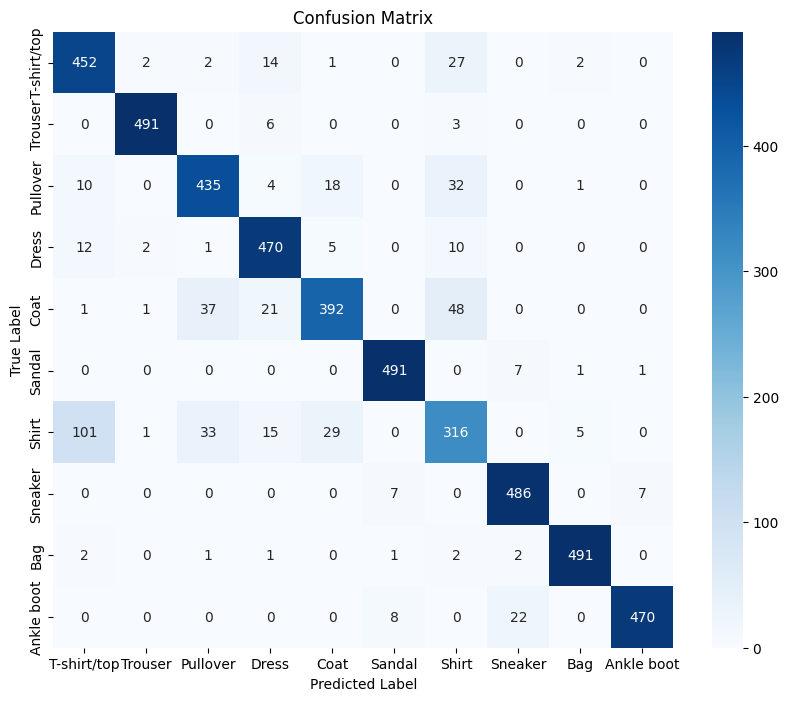

In [9]:
# Define class labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class for each sample
y_true = test_generator.classes  # True class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix with class labels
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=class_labels,  # Use class labels for x-axis
    yticklabels=class_labels   # Use class labels for y-axis
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Classification Report

In [10]:
# Generate a detailed classification report
print(classification_report(
    y_true, y_pred_classes,
    target_names=list(test_generator.class_indices.keys())
))


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       500
           1       0.99      0.98      0.98       500
           2       0.85      0.87      0.86       500
           3       0.89      0.94      0.91       500
           4       0.88      0.78      0.83       500
           5       0.97      0.98      0.98       500
           6       0.72      0.63      0.67       500
           7       0.94      0.97      0.96       500
           8       0.98      0.98      0.98       500
           9       0.98      0.94      0.96       500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



In [11]:
# Generate a detailed classification report using class names
print(classification_report(
    y_true, y_pred_classes,
    target_names=list(class_labels)
))


              precision    recall  f1-score   support

 T-shirt/top       0.78      0.90      0.84       500
     Trouser       0.99      0.98      0.98       500
    Pullover       0.85      0.87      0.86       500
       Dress       0.89      0.94      0.91       500
        Coat       0.88      0.78      0.83       500
      Sandal       0.97      0.98      0.98       500
       Shirt       0.72      0.63      0.67       500
     Sneaker       0.94      0.97      0.96       500
         Bag       0.98      0.98      0.98       500
  Ankle boot       0.98      0.94      0.96       500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



## Plot ROC Curve and Compute AUC

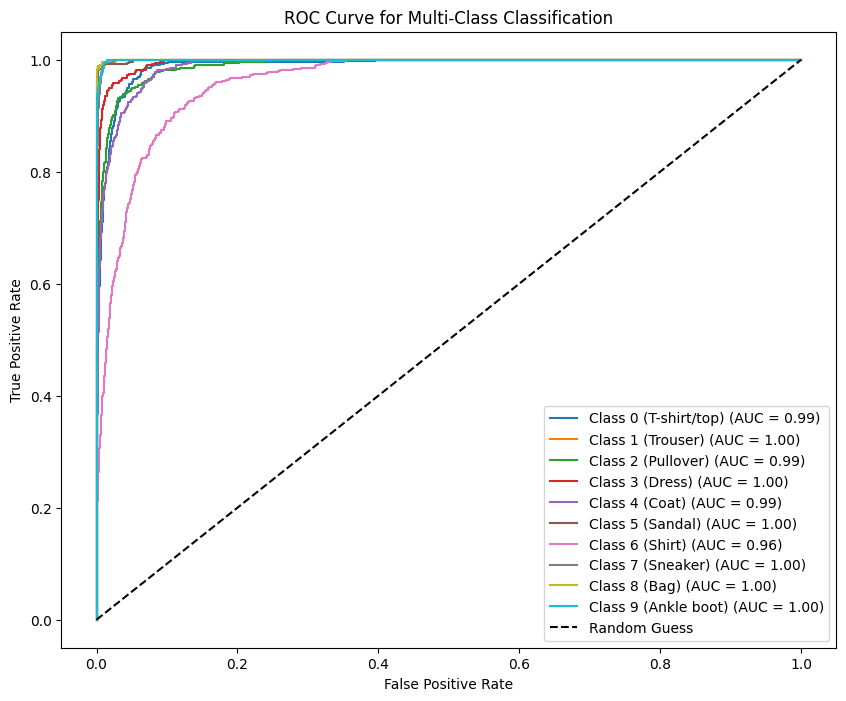


AUC Values by Class:
   Class Index   Class Name  AUC Value
0            0  T-shirt/top   0.989780
1            1      Trouser   0.999796
2            2     Pullover   0.989765
3            3        Dress   0.995587
4            4         Coat   0.988023
5            5       Sandal   0.999461
6            6        Shirt   0.961056
7            7      Sneaker   0.999102
8            8          Bag   0.999829
9            9   Ankle boot   0.999550


In [15]:
from sklearn.preprocessing import label_binarize
import pandas as pd


# Number of classes
n_classes = len(test_generator.class_indices)

# One-hot encode the true labels
y_true_one_hot = label_binarize(test_generator.labels, classes=range(n_classes))

# Initialize a list to store AUC values
auc_values = []

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)  # Compute the AUC
    auc_values.append((i, class_labels[i], roc_auc))  # Store the class index, name, and AUC
    plt.plot(fpr, tpr, label=f"Class {i} ({class_labels[i]}) (AUC = {roc_auc:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

# Add titles, labels, and legend
plt.title("ROC Curve for Multi-Class Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Display AUC values in a table
auc_table = pd.DataFrame(auc_values, columns=["Class Index", "Class Name", "AUC Value"])
print("\nAUC Values by Class:")
print(auc_table)


### Evaluating and Displaying Predictions (for test images)

1/1 [==============================] - 0s 19ms/step


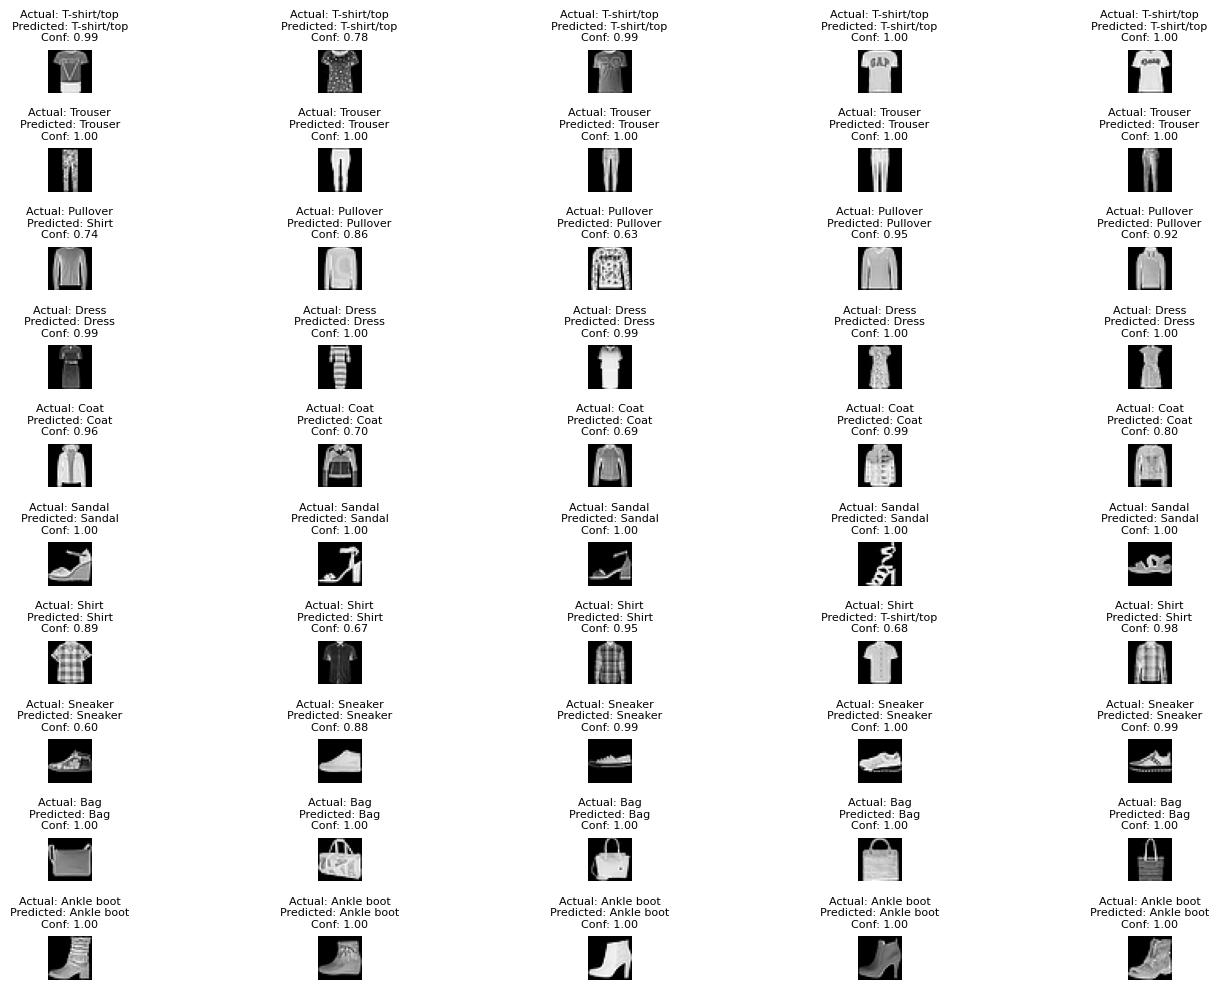

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
sample_test_data_dir = "Sample_Test_Data"  # Directory containing test images
model_path = "fashion_mnist_cnn_model.h5"  # Path to the trained model
img_height, img_width = 28, 28  # Image dimensions
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Load the trained model
model = load_model(model_path)

# Function to predict the class of an image
def predict_image(image_path, model):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(img_height, img_width), color_mode="grayscale")
    image_array = img_to_array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]
    return predicted_class, confidence, image

# Collect predictions and images
images, titles = [], []
for class_folder in os.listdir(sample_test_data_dir):
    class_folder_path = os.path.join(sample_test_data_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_file in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_file)

            # Predict the image class
            predicted_class, confidence, image = predict_image(image_path, model)

            # Prepare the title and collect image
            actual_label = class_labels[int(class_folder)]
            predicted_label = class_labels[predicted_class]
            titles.append(
                f"Actual: {actual_label}\nPredicted: {predicted_label}\nConf: {confidence:.2f}"
            )
            images.append(image)

# Display predictions as a grid
n_images = len(images)
n_cols = 5  # Number of columns in the grid
n_rows = (n_images + n_cols - 1) // n_cols  # Calculate rows dynamically

plt.figure(figsize=(15, 10))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(np.squeeze(img_to_array(img)), cmap="gray")
    plt.title(title, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()
